### Dataset

We are using drug and medical data available publicly on Kaggle as our toy dataset for this project. 

The dataset can be found at : https://www.kaggle.com/code/dhyanidesai/medical-adherence-classification

The csv files from dataset used : 'patients.csv', 'medications.csv'


### Experiement 

#### Training Data:

Using the medications/drug data at our disposal, we aim to find the total number of patients taking each unique drug in the dataset. To better train our model we are not considering drugs that have been prescribed to 10 patients or less. 

We then use this data to calculate the adherence rates of each unique drug based on patient and medication information. (Explain start / stop calc, etc).

We then merge the adherence scores with other patient demographic information. 

#### Machine Learning Model:

Once we have created our training data of drugs, adherence rates, demographic information, etc, we use a supervised learning model to predict adherence rates of drugs in certain geographical locations. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [3]:
# load csv files used
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')
conditions = pd.read_csv('conditions.csv')

In [4]:
# pre-processing BIRTHDATE and DEATHDATE columns for patients
patients['BIRTHDATE'] = patients['BIRTHDATE'].astype(str)
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'], format='%d-%m-%Y')

patients['DEATHDATE'] = patients['DEATHDATE'].fillna(pd.Timestamp('01-01-2100').strftime('%d-%m-%Y'))
patients['DEATHDATE'] = patients['DEATHDATE'].astype(str)
patients['DEATHDATE'] = pd.to_datetime(patients['DEATHDATE'], format='%d-%m-%Y')

patients = patients.rename(columns={'Id': 'PATIENT'})

# pre-processing START and STOP columns for medications
medications['START'] = medications['START'].astype(str)

medications['STOP'] = medications['STOP'].fillna(pd.Timestamp('01-01-2100').strftime('%Y-%m-%d'))
medications['STOP'] = medications['STOP'].astype(str)

for index, row in medications.iterrows():
    medications.at[index, 'START'] = row['START'].split('T')[0]
    medications.at[index, 'STOP'] = row['STOP'].split('T')[0]

medications['START'] = pd.to_datetime(medications['START'], format='%Y-%m-%d')
medications['STOP'] = pd.to_datetime(medications['STOP'], format='%Y-%m-%d')

# pre-processing START and STOP columns for conditions
conditions['START'] = conditions['START'].astype(str)
conditions['START'] = pd.to_datetime(conditions['START'], format='%d-%m-%Y')

conditions['STOP'] = conditions['STOP'].fillna(pd.Timestamp('01-01-2100').strftime('%d-%m-%Y'))
conditions['STOP'] = conditions['STOP'].astype(str)
conditions['STOP'] = pd.to_datetime(conditions['STOP'], format='%d-%m-%Y')

In [37]:
display(patients.head(1))
display(medications.head(1))
display(conditions.head(1))

,PATIENT,BIRTHDATE,DEATHDATE,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,2100-01-01,Eusebio566,Wyman904,NaN,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36


,START,STOP,PATIENT,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2012-10-14,2012-10-25,00185faa-2760-4218-9bf5-db301acf8274,Penicillin V Potassium 250 MG Oral Tablet,20.48,0.0,1,20.48,43878008.0,Streptococcal sore throat (disorder)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2012-08-03,2012-08-11,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,195662009.0,Acute viral pharyngitis (disorder)


### DO NOT RUN ABOVE THIS LINE!!!!!!!!!!!!!!!

In [54]:
# merging medication with condition on start date and patient ID as keys
group_condition_medication = pd.merge(medications, conditions, on = ['PATIENT', 'START'], how='inner')

display(group_condition_medication.head(1))
print(len(group_condition_medication))

,START,STOP_x,PATIENT,DESCRIPTION_x,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION,STOP_y,ENCOUNTER,CODE,DESCRIPTION_y
0,2012-10-14,2012-10-25,00185faa-2760-4218-9bf5-db301acf8274,Penicillin V Potassium 250 MG Oral Tablet,20.48,0.0,1,20.48,43878008.0,Streptococcal sore throat (disorder),2012-10-25,ce150f69-e3a6-4793-95b6-243f754723c3,43878008.0,Streptococcal sore throat (disorder)


4491


In [55]:
# merging grouped medication, condition with patient on patient ID as key
final_group = pd.merge(group_condition_medication, patients, on = ['PATIENT'], how='inner')

display(final_group.head(1))
print(len(final_group))
print(final_group.columns)

,START,STOP_x,PATIENT,DESCRIPTION_x,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION,...,LAST,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,2012-10-14,2012-10-25,00185faa-2760-4218-9bf5-db301acf8274,Penicillin V Potassium 250 MG Oral Tablet,20.48,0.0,1,20.48,43878008.0,Streptococcal sore throat (disorder),...,Wyman904,NaN,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36


4491
Index(['START', 'STOP_x', 'PATIENT', 'DESCRIPTION_x', 'BASE_COST',
       'PAYER_COVERAGE', 'DISPENSES', 'TOTALCOST', 'REASONCODE',
       'REASONDESCRIPTION', 'STOP_y', 'ENCOUNTER', 'CODE', 'DESCRIPTION_y',
       'BIRTHDATE', 'DEATHDATE', 'FIRST', 'LAST', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'CITY', 'STATE', 'COUNTY', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE'],
      dtype='object')


In [56]:
# post-processing final grouped dataframe to remove extra columns and rename required features
selected_cols = ['PATIENT', 'DESCRIPTION_x', 'START', 'STOP_y', 'STOP_x', 'BASE_COST', 'PAYER_COVERAGE','CITY', 'STATE', 'COUNTY']
final_data = final_group[selected_cols]

display(final_data.head(1))

,PATIENT,DESCRIPTION_x,START,STOP_y,STOP_x,BASE_COST,PAYER_COVERAGE,CITY,STATE,COUNTY
0,00185faa-2760-4218-9bf5-db301acf8274,Penicillin V Potassium 250 MG Oral Tablet,2012-10-14,2012-10-25,2012-10-25,20.48,0.0,Lynn,Massachusetts,Essex County


In [57]:
# inputing new features and target label into final_data
for index, row in final_data.iterrows():
    final_data.at[index, 'OUT_OF_POCKET_COST'] = row['BASE_COST'] - row['PAYER_COVERAGE']

display(final_data.head(3))

/var/folders/j1/1yf4p72d5qn097_6xdrl6cf00000gn/T/ipykernel_5238/667998948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.at[index, 'OUT_OF_POCKET_COST'] = row['BASE_COST'] - row['PAYER_COVERAGE']


,PATIENT,DESCRIPTION_x,START,STOP_y,STOP_x,BASE_COST,PAYER_COVERAGE,CITY,STATE,COUNTY,OUT_OF_POCKET_COST
0,00185faa-2760-4218-9bf5-db301acf8274,Penicillin V Potassium 250 MG Oral Tablet,2012-10-14,2012-10-25,2012-10-25,20.48,0.00,Lynn,Massachusetts,Essex County,20.48
1,00185faa-2760-4218-9bf5-db301acf8274,Abuse-Deterrent 12 HR Oxycodone Hydrochloride ...,2017-12-21,2100-01-01,2018-01-18,185.70,110.70,Lynn,Massachusetts,Essex County,75.00
2,00185faa-2760-4218-9bf5-db301acf8274,Acetaminophen 325 MG / Oxycodone Hydrochloride...,2018-10-18,2100-01-01,2018-11-01,818.96,743.96,Lynn,Massachusetts,Essex County,75.00


In [58]:
# calculating target label, adherence score

for index, row in final_data.iterrows():
    if (final_data.at[index, 'STOP_y'] == pd.Timestamp('01-01-2100')) and (final_data.at[index, 'STOP_x'] == pd.Timestamp('01-01-2100')):
        final_data.at[index, 'ADHERENCE'] = 1
            
    elif (final_data.at[index, 'STOP_y'] == pd.Timestamp('01-01-2100')) and (final_data.at[index, 'STOP_x'] < pd.Timestamp('01-01-2100')):
        final_data.at[index, 'ADHERENCE'] = 0
        
    elif (final_data.at[index, 'STOP_y'] < pd.Timestamp('01-01-2100')) and (final_data.at[index, 'STOP_x'] < pd.Timestamp('01-01-2100')):
        
        start_date = final_data.at[index, 'STOP_y'] - pd.DateOffset(days=15)
        end_date = final_data.at[index, 'STOP_y'] + pd.DateOffset(days=15)
        
        if (final_data.at[index, 'STOP_x'] >= start_date) and (final_data.at[index, 'STOP_x'] <= end_date):
            final_data.at[index, 'ADHERENCE'] = 1
        else:
            final_data.at[index, 'ADHERENCE'] = 0
        
    else:
        
        final_data.at[index, 'ADHERENCE'] = 1
                

/var/folders/j1/1yf4p72d5qn097_6xdrl6cf00000gn/T/ipykernel_5238/2061263481.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.at[index, 'ADHERENCE'] = 1


In [89]:
display(final_data.head(3))

count = final_data['ADHERENCE'].value_counts()

addict = count[count == 11].index

addiction = final_data[final_data['ADHERENCE'].isin(addict)]

,PATIENT,DESCRIPTION_x,START,STOP_y,STOP_x,BASE_COST,PAYER_COVERAGE,CITY,STATE,COUNTY,OUT_OF_POCKET_COST,ADHERENCE
0,00185faa-2760-4218-9bf5-db301acf8274,Penicillin V Potassium 250 MG Oral Tablet,2012-10-14,2012-10-25,2012-10-25,20.48,0.00,Lynn,Massachusetts,Essex County,20.48,1.0
1,00185faa-2760-4218-9bf5-db301acf8274,Abuse-Deterrent 12 HR Oxycodone Hydrochloride ...,2017-12-21,2100-01-01,2018-01-18,185.70,110.70,Lynn,Massachusetts,Essex County,75.00,0.0
2,00185faa-2760-4218-9bf5-db301acf8274,Acetaminophen 325 MG / Oxycodone Hydrochloride...,2018-10-18,2100-01-01,2018-11-01,818.96,743.96,Lynn,Massachusetts,Essex County,75.00,0.0


In [61]:
grouped_medications = final_data.groupby(['DESCRIPTION_x']).agg({'ADHERENCE': 'mean', 'OUT_OF_POCKET_COST': 'mean'})
display(grouped_medications)


,ADHERENCE,OUT_OF_POCKET_COST
DESCRIPTION_x,,
0.25 ML Leuprolide Acetate 30 MG/ML Prefilled Syringe,1.000000,263.490000
1 ML DOCEtaxel 20 MG/ML Injection,1.000000,263.490000
1 ML Epinephrine 1 MG/ML Injection,0.000000,4.193571
1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],0.666667,40.000000
1 ML medroxyprogesterone acetate 150 MG/ML Injection,1.000000,266.530000
...,...,...
atomoxetine 100 MG Oral Capsule,1.000000,282.633333
clonazePAM 0.25 MG Oral Tablet,0.388889,131.302778
ferrous sulfate 325 MG Oral Tablet,1.000000,263.490000


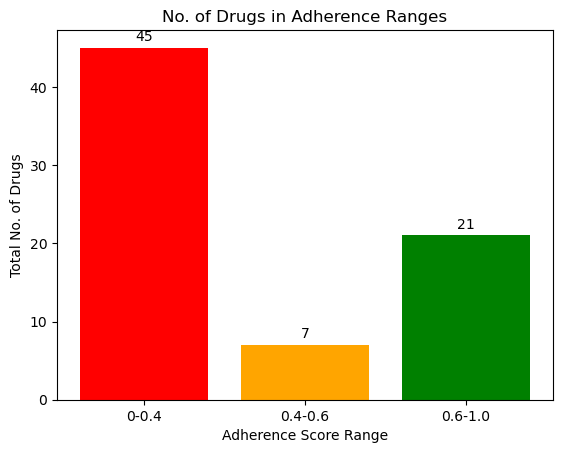

In [92]:
# Conducting analysis on data created

grouped_adherence = pd.DataFrame(grouped_medications['ADHERENCE'].value_counts())
grouped_adherence = grouped_adherence.reset_index()
grouped_adherence = grouped_adherence.rename(columns={'index': 'VALUE', 'ADHERENCE': 'COUNTS'})


# Plotting the graph

# Group data into the specified ranges and sum the counts
bins = [0, 0.4, 0.6, 2.0]
labels = ['0-0.4', '0.4-0.6', '0.6-1.0']
df['Range'] = pd.cut(df['VALUE'], bins=bins, labels=labels, right=False)
grouped_df = df.groupby('Range')['COUNTS'].sum().reset_index()

# Define colors for each bar
colors = ['red', 'orange', 'green']

# Plot the graph
fig, ax = plt.subplots()
bars = plt.bar(grouped_df['Range'], grouped_df['COUNTS'], color=colors)

# Add count values for each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Adherence Score Range')
plt.ylabel('Total No. of Drugs')
plt.title('No. of Drugs in Adherence Ranges')
plt.show()

In [102]:
# Extracting drugs with high adherence rate

high_adherence_drugs = []
medium_adherence_drugs = []
low_adherence_drugs = []

for index, row in grouped_medications.iterrows():
    
    if row['ADHERENCE'] >= 0.6:
        high_adherence_drugs.append(row.name)
        
    elif row['ADHERENCE'] >= 0.4:
        medium_adherence_drugs.append(row.name)
        
    else:
        low_adherence_drugs.append(row.name)


print("High Adherence Drugs: \n\n", high_adherence_drugs)
print("\n\nMedium Adherence Drugs: \n\n", medium_adherence_drugs)
print("\n\nLow Adherence Drugs: \n\n", low_adherence_drugs)

High Adherence Drugs: 

 ['0.25 ML Leuprolide Acetate 30 MG/ML Prefilled Syringe', '1 ML DOCEtaxel 20 MG/ML Injection', '1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen]', '1 ML medroxyprogesterone acetate 150 MG/ML Injection', '12 HR Cefaclor 500 MG Extended Release Oral Tablet', '24hr nicotine transdermal patch', 'Acetaminophen 21.7 MG/ML / Dextromethorphan Hydrobromide 1 MG/ML / doxylamine succinate 0.417 MG/ML Oral Solution', 'Acetaminophen 325 MG Oral Tablet', 'Alendronic acid 10 MG Oral Tablet', 'Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet', 'Ibuprofen 200 MG Oral Tablet', 'Levothyroxine Sodium 0.075 MG Oral Tablet', 'Methotrexate 2.5 MG Oral Tablet', 'Methylphenidate Hydrochloride 20 MG Oral Tablet', 'Naproxen sodium 220 MG Oral Tablet', 'Penicillin V Potassium 250 MG Oral Tablet', 'Penicillin V Potassium 500 MG Oral Tablet', 'Vitamin B 12 5 MG/ML Injectable Solution', 'atomoxetine 100 MG Oral Capsule', 'ferrous sulfate 325 MG Oral Tablet', 'predniSONE 5 MG Oral Tablet']